In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

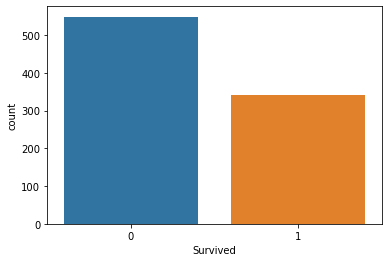

In [9]:
sns.countplot(x="Survived",data=df)

In [10]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [11]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

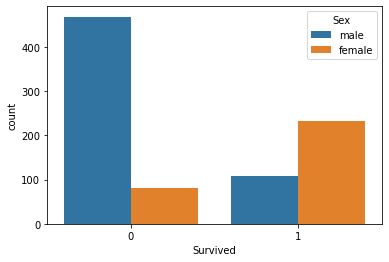

In [12]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

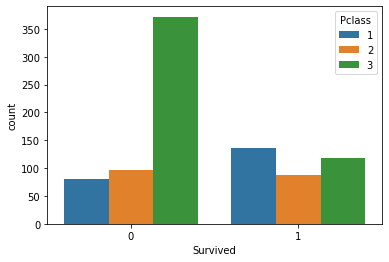

In [13]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

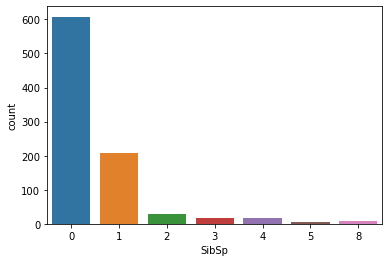

In [14]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:>

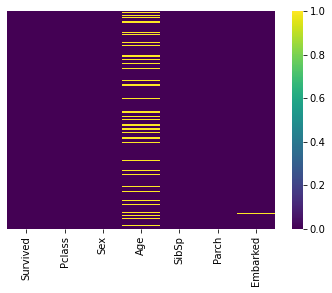

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

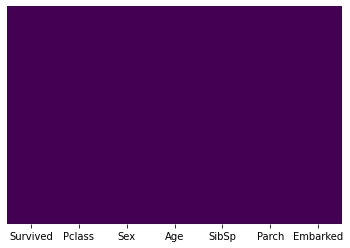

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Embarked  712 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [19]:
dummies=pd.get_dummies(df[["Sex","Embarked","Pclass"]],
                      columns=["Sex","Embarked","Pclass"],drop_first=True)

In [20]:
df=pd.concat([df,dummies],axis=1)

In [21]:

columns=["Sex","Embarked","Pclass"]



In [22]:
df.drop(columns,axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Sex_male    712 non-null    uint8  
 5   Embarked_Q  712 non-null    uint8  
 6   Embarked_S  712 non-null    uint8  
 7   Pclass_2    712 non-null    uint8  
 8   Pclass_3    712 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 31.3 KB


In [24]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

In [25]:
df.head()

,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [27]:
lowage,uppage=remove_outlier(df['Age'])
df["Age"]=np.where(df['Age']>uppage,uppage,df['Age'])
df["Age"]=np.where(df['Age']<lowage,lowage,df['Age'])

In [28]:
lowage,uppage=remove_outlier(df['SibSp'])
df["SibSp"]=np.where(df['SibSp']>uppage,uppage,df['SibSp'])
df["SibSp"]=np.where(df['SibSp']<lowage,lowage,df['SibSp'])

In [29]:
lowage,uppage=remove_outlier(df['Parch'])
df["Parch"]=np.where(df['Parch']>uppage,uppage,df['Parch'])
df["Parch"]=np.where(df['Parch']<lowage,lowage,df['Parch'])

In [30]:
df.corr()

,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
Survived,1.000000,-0.082373,0.027703,0.137597,-0.536762,-0.048966,-0.159015,0.086891,-0.335364
Age,-0.082373,1.000000,-0.275098,-0.262090,0.096547,-0.023741,-0.024410,0.010895,-0.312073
SibSp,0.027703,-0.275098,1.000000,0.431429,-0.143850,0.024435,0.005353,-0.020216,0.018633
Parch,0.137597,-0.262090,0.431429,1.000000,-0.259161,-0.026811,0.004316,0.000532,-0.005319
Sex_male,-0.536762,0.096547,-0.143850,-0.259161,1.000000,-0.027256,0.109078,-0.075347,0.158446
Embarked_Q,-0.048966,-0.023741,0.024435,-0.026811,-0.027256,1.000000,-0.378859,-0.080929,0.145087
Embarked_S,-0.159015,-0.024410,0.005353,0.004316,0.109078,-0.378859,1.000000,0.168577,0.093140
Pclass_2,0.086891,0.010895,-0.020216,0.000532,-0.075347,-0.080929,0.168577,1.000000,-0.564948
Pclass_3,-0.335364,-0.312073,0.018633,-0.005319,0.158446,0.145087,0.093140,-0.564948,1.000000


In [31]:
from sklearn.preprocessing import StandardScaler
got=StandardScaler()
got

StandardScaler()

In [32]:
df['Age']=got.fit_transform(df[['Age']])

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale=MinMaxScaler()
minmax_scale

MinMaxScaler()

In [34]:
df['SibSp']=minmax_scale.fit_transform(df[['SibSp']])

In [35]:
df['Parch']=minmax_scale.fit_transform(df[['Parch']])

In [36]:
df['Age'].head()

0   -0.530040
1    0.590499
2   -0.249905
3    0.380398
4    0.380398
Name: Age, dtype: float64

In [37]:
x=df.drop(['Survived'],axis=1)
y=df[['Survived']]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [39]:
reg=LogisticRegression()

In [40]:
reg.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
predictions=reg.predict(x_test)

In [42]:
reg.score(x_train,y_train)

0.8012048192771084

In [43]:
reg.score(x_test,y_test)

0.794392523364486

In [44]:
from sklearn import metrics

In [45]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.75      0.75      0.75        88

    accuracy                           0.79       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.79      0.79      0.79       214



In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[104,  22],
       [ 22,  66]], dtype=int64)

<AxesSubplot:>

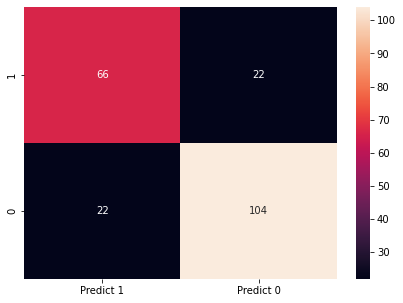

In [47]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [49]:
xscaled=x.apply(zscore)
xscaled.describe()

,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,1.446253e-17,4.656076e-16,6.455510e-17,5.083325e-17,-4.740278e-17,7.921254e-17,1.425202e-16,-1.668453e-16
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-2.041367e+00,-6.352756e-01,-5.577492e-01,-1.322511e+00,-2.023257e-01,-1.872519e+00,-5.665375e-01,-9.971949e-01
25%,-6.701073e-01,-6.352756e-01,-5.577492e-01,-1.322511e+00,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
50%,-1.098378e-01,-6.352756e-01,-5.577492e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
75%,5.904991e-01,7.760075e-01,8.430177e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,1.002813e+00
max,2.481409e+00,2.892932e+00,2.944168e+00,7.561375e-01,4.942527e+00,5.340398e-01,1.765108e+00,1.002813e+00


In [50]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.30,random_state=1)

In [51]:
NNH=KNeighborsClassifier(n_neighbors=29)

In [52]:
NNH.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=29)

In [53]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.7897196261682243

In [54]:
NNH.score(x_train,y_train)

0.8012048192771084

In [55]:
from sklearn.naive_bayes import GaussianNB


In [56]:
NB=GaussianNB(var_smoothing=1e-5)

In [57]:
NB.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB(var_smoothing=1e-05)

In [58]:
NB.score(x_test,y_test)

0.7757009345794392

In [59]:
NB.score(x_train,y_train)

0.7670682730923695

In [60]:
from sklearn.svm import SVC

In [61]:
svc_model=SVC()


In [62]:
svc_model=SVC()


In [63]:
svc_model.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [64]:
svc_model.score(x_test,y_test)

0.8130841121495327

In [65]:
svc_model.score(x_train,y_train)

0.8433734939759037

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
#instantiating
model=DecisionTreeClassifier()

In [68]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
model.score(x_train,y_train)

0.9578313253012049

In [70]:
model.score(x_test,y_test)

0.7570093457943925

In [71]:
model1=DecisionTreeClassifier(max_depth=4)

In [72]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [73]:
model1.score(x_train,y_train)

0.8373493975903614

In [74]:
model1.score(x_test,y_test)

0.7897196261682243

In [75]:
from sklearn.ensemble import BaggingClassifier

In [76]:
bc=BaggingClassifier(n_estimators=50,base_estimator=model1)

In [77]:
bc.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  n_estimators=50)

In [78]:
bc.score(x_train,y_train)

0.8473895582329317

In [79]:
bc.score(x_test,y_test)

0.780373831775701

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
abc=AdaBoostClassifier(n_estimators=2,base_estimator=model1)

In [82]:
abc.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=2)

In [83]:
abc.score(x_train,y_train)

0.8634538152610441

In [84]:
abc.score(x_test,y_test)

0.780373831775701

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbc=GradientBoostingClassifier(n_estimators=20,learning_rate=0.10)

In [87]:
gbc.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(n_estimators=20)

In [88]:
gbc.score(x_train,y_train)

0.8373493975903614

In [89]:
gbc.score(x_test,y_test)

0.794392523364486

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [92]:
rf=RandomForestClassifier(n_estimators=18,max_depth=5,max_features=5,criterion="entropy")

In [93]:
rf.fit(x_train,y_train)

C:\Users\rupes\AppData\Local\Temp/ipykernel_11552/1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       n_estimators=18)

In [94]:
rf.score(x_train,y_train)

0.8493975903614458

In [95]:
rf.score(x_test,y_test)

0.7850467289719626

In [96]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [106]:
from xgboost import XGBClassifier


In [219]:
xgb=XGBClassifier(n_estimators=10,max_depth=3)

In [220]:
xgb.fit(x_train,y_train)

[16:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rupes\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
xgb.score(x_train,y_train)

0.8413654618473896

In [222]:
xgb.score(x_test,y_test)

0.7990654205607477